In [1]:

# pip3 install joblib
# pip3 install openml
import pandas as pd
import numpy as np
from gtda.time_series import Resampler, SlidingWindow, takens_embedding_optimal_parameters, \
    TakensEmbedding, PermutationEntropy
from gtda.homology import WeakAlphaPersistence, VietorisRipsPersistence
from gtda.diagrams import Scaler, Filtering, PersistenceEntropy, BettiCurve, PairwiseDistance
from gtda.graphs import KNeighborsGraph, GraphGeodesicDistance

from gtda.pipeline import Pipeline

import numpy as np
from sklearn.metrics import pairwise_distances

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# gtda plotting functions
from gtda.plotting import plot_heatmap

# Import data from openml
import openml


In [2]:
x_periodic = np.linspace(0, 10, 1000)
# Euler?
y_periodic = np.cos(5 * x_periodic)
y_periodic

array([ 1.00000000e+00,  9.98747758e-01,  9.94994167e-01,  9.88748629e-01,
        9.80026785e-01,  9.68850478e-01,  9.55247701e-01,  9.39252521e-01,
        9.20904997e-01,  9.00251081e-01,  8.77342499e-01,  8.52236627e-01,
        8.24996341e-01,  7.95689865e-01,  7.64390596e-01,  7.31176922e-01,
        6.96132027e-01,  6.59343679e-01,  6.20904016e-01,  5.80909308e-01,
        5.39459722e-01,  4.96659067e-01,  4.52614537e-01,  4.07436441e-01,
        3.61237927e-01,  3.14134698e-01,  2.66244723e-01,  2.17687942e-01,
        1.68585966e-01,  1.19061768e-01,  6.92393823e-02,  1.92435873e-02,
       -3.08004029e-02, -8.07672539e-02, -1.30531825e-01, -1.79969480e-01,
       -2.28956405e-01, -2.77369913e-01, -3.25088751e-01, -3.71993410e-01,
       -4.17966417e-01, -4.62892633e-01, -5.06659542e-01, -5.49157530e-01,
       -5.90280161e-01, -6.29924445e-01, -6.67991093e-01, -7.04384767e-01,
       -7.39014320e-01, -7.71793024e-01, -8.02638783e-01, -8.31474347e-01,
       -8.58227495e-01, -

In [3]:
dt = pd.DataFrame(y_periodic)

In [4]:
dt

,0
0,1.000000
1,0.998748
2,0.994994
3,0.988749
4,0.980027
...,...
995,0.893515
996,0.914861
997,0.933916
998,0.950631


<AxesSubplot:>

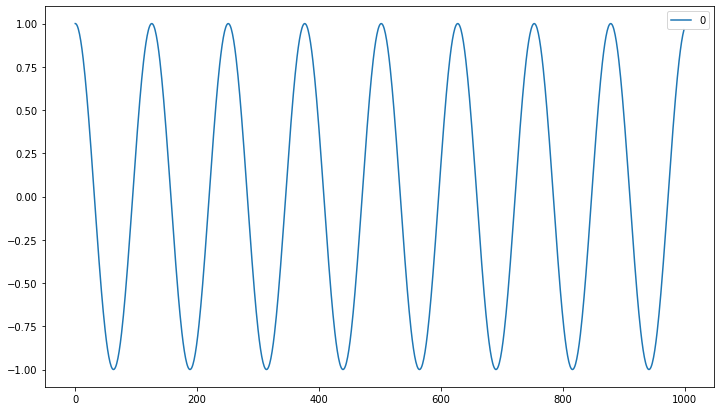

In [5]:
dt.plot(figsize=(12, 7))

In [6]:
0.998748 - 0.994994

0.003753999999999924

In [7]:
0.988749 - 0.980027

0.008722000000000008

In [8]:
sla = np.linspace(0, 10, 1000)
sla

array([ 0.        ,  0.01001001,  0.02002002,  0.03003003,  0.04004004,
        0.05005005,  0.06006006,  0.07007007,  0.08008008,  0.09009009,
        0.1001001 ,  0.11011011,  0.12012012,  0.13013013,  0.14014014,
        0.15015015,  0.16016016,  0.17017017,  0.18018018,  0.19019019,
        0.2002002 ,  0.21021021,  0.22022022,  0.23023023,  0.24024024,
        0.25025025,  0.26026026,  0.27027027,  0.28028028,  0.29029029,
        0.3003003 ,  0.31031031,  0.32032032,  0.33033033,  0.34034034,
        0.35035035,  0.36036036,  0.37037037,  0.38038038,  0.39039039,
        0.4004004 ,  0.41041041,  0.42042042,  0.43043043,  0.44044044,
        0.45045045,  0.46046046,  0.47047047,  0.48048048,  0.49049049,
        0.5005005 ,  0.51051051,  0.52052052,  0.53053053,  0.54054054,
        0.55055055,  0.56056056,  0.57057057,  0.58058058,  0.59059059,
        0.6006006 ,  0.61061061,  0.62062062,  0.63063063,  0.64064064,
        0.65065065,  0.66066066,  0.67067067,  0.68068068,  0.69

<AxesSubplot:>

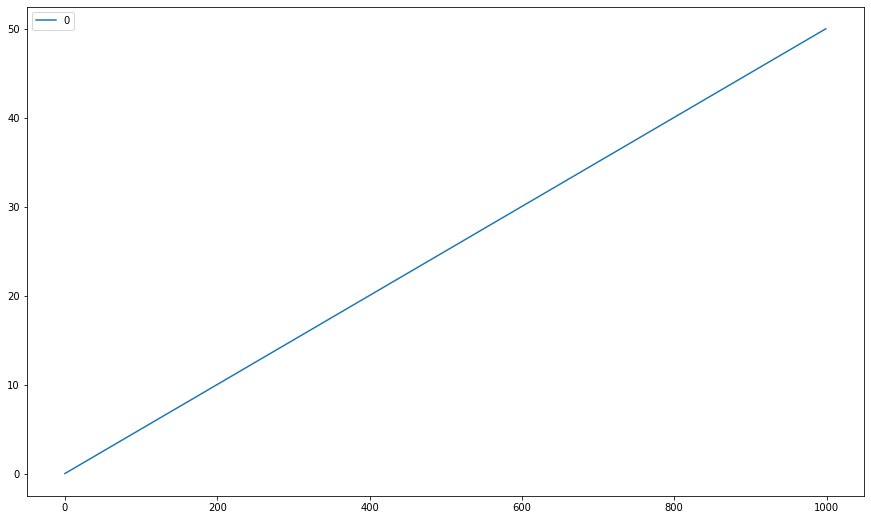

In [12]:
sla = np.linspace(0, 50, 1000)
data_sla = pd.DataFrame(sla)
data_sla.plot(figsize=(15, 9))